**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Mentoría**

*Edición 2023*

----

# Análisis de predicciones

## Ejercicio 3 - Análisis de noticias:

1. Calcular el *rendimiento relativo* para restar al movimiento general del mercado.
2. Graficar cambios de precio por acción.

----

### Imports

In [1]:
import seaborn

import pandas as pd
import matplotlib.pyplot as plt

### Lectura de datasets

In [2]:
events = pd.read_csv('https://gitlab.com/diplodatos/mentoria/-/raw/main/parte_3/datasets/events.csv')

In [3]:
print(f'Events shape: {events.shape}')
events.head()

Events shape: (5586, 27)


noticia                                             frases  \
0       15    represent 10 increase pay previous four quarter   
1       48  technology receive nondilutive grant contract ...   
2       99  28 2021 prnewswire duke energy nyse duk alongs...   
3      104  sugar land texas march 1 2021 prnewswire treco...   
4      119  nasdaq srne recently announce fda acceptance i...   

                                               title  \
0  Amgen Announces 10% Increase In 2021 First Qua...   
1  CytoSorbents Announces Filing of an Investigat...   
2  Duke Energy partners with GIC to secure minori...   
3  Trecora Resources Announces New $20 Million Sh...   
4  Optimism Building As Additional COVID-19 Vacci...   

                    pub_time labels.ticker          labels.start_time  \
0  2020-12-16 16:30:00-05:00          AMGN  2020-12-16 16:30:00-05:00   
1  2021-03-16 15:15:00-04:00          CTSO  2021-03-16 15:15:00-04:00   
2  2021-01-28 17:33:00-05:00           DUK  2021-01-28 17:33:00-05:00   
3  2021-03-01 08:30:00-05:00          TREC  2021-03-01 09:30:00-05:00   
4  2020-12-21 08:55:00-05:00           PFE  2020-12-21 08:55:00-05:00   

   labels.start_price_open  labels.start_price_close  labels.end_price_1day  \
0                   228.68                  228.7000                 230.27   
1                     9.36                    9.4866                   9.25   
2                    93.67                   93.6700                  91.52   
3                     7.37                    7.2400                   7.33   
4                    37.35                   37.3300                  37.21   

   labels.end_price_2day  ...   labels.highest_time_1day  \
0                 230.39  ...  2020-12-16 16:48:00-05:00   
1                   8.99  ...  2021-03-16 15:15:00-04:00   
2                  93.71  ...  2021-01-28 17:35:00-05:00   
3                   7.27  ...  2021-03-01 09:30:00-05:00   
4                  36.82  ...  2020-12-21 09:04:00-05:00   

    labels.highest_time_2day   labels.highest_time_3day  \
0  2020-12-17 16:01:00-05:00  2020-12-18 09:28:00-05:00   
1  2021-03-16 15:15:00-04:00  2021-03-16 15:15:00-04:00   
2  2021-01-29 11:24:00-05:00  2021-01-29 11:24:00-05:00   
3  2021-03-01 09:30:00-05:00  2021-03-03 12:10:00-05:00   
4  2020-12-21 09:04:00-05:00  2020-12-21 09:04:00-05:00   

  labels.lowest_price_1day  labels.lowest_price_2day  \
0                  228.680                   228.680   
1                    9.250                     8.710   
2                   91.520                    91.050   
3                    7.155                     7.155   
4                   36.910                    36.600   

   labels.lowest_price_3day    labels.lowest_time_1day  \
0                   227.250  2020-12-16 16:30:00-05:00   
1                     8.660  2021-03-16 16:23:00-04:00   
2                    91.050  2021-01-28 19:58:00-05:00   
3                     7.155  2021-03-01 12:19:00-05:00   
4                    36.600  2020-12-21 10:06:00-05:00   

     labels.lowest_time_2day    labels.lowest_time_3day events  
0  2020-12-16 16:30:00-05:00  2020-12-18 14:26:00-05:00   I-DI  
1  2021-03-17 12:04:00-04:00  2021-03-18 15:54:00-04:00   I-NC  
2  2021-01-29 09:30:00-05:00  2021-01-29 09:30:00-05:00    I-A  
3  2021-03-01 12:19:00-05:00  2021-03-01 12:19:00-05:00   I-SR  
4  2020-12-22 16:19:00-05:00  2020-12-22 16:19:00-05:00   I-CT  

[5 rows x 27 columns]

### Análisis de noticias

Usando como base el análisis anterior, realizaremos un análisis sobre las noticias etiquetadas, los tickers correspondientes a cada una y los cambios de precios que pudo haber tenido la acción basándonos en el evento con el que fue etiquetada. 

Vamos a realizar el cálculo del porcentaje de variación total en 3 días.

In [4]:
events['percentage_3days'] = ((events['labels.end_price_3day'] / events['labels.start_price_open']) - 1) * 100

Existen casos en que se detectan más de un evento, por lo tanto, para este análisis solo se tendrán aquellas noticias que tengan un único evento asociado.

In [5]:
# Paso 1: Agrupa los datos por la columna "noticia"
grupos_noticia = events.groupby('noticia')

# Paso 2: Cuenta la cantidad de eventos distintos para cada grupo
conteo_eventos = grupos_noticia['events'].nunique()

# Paso 3: Filtra los grupos con un solo evento distinto
news_index = conteo_eventos[conteo_eventos == 1].index

# Paso 4: Concatena los grupos filtrados para obtener el DataFrame final
news_data = events[events['noticia'].isin(news_index)]

In [6]:
news_data[['events', 'labels.ticker', 'percentage_3days']].head()

events labels.ticker  percentage_3days
0   I-DI          AMGN         -0.183663
1   I-NC          CTSO         -7.264957
2    I-A           DUK         -1.227714
3   I-SR          TREC          2.442334
4   I-CT           PFE          0.401606

Una vez filtrado el dataset de eventos, analizaremos utilizando *boxplots* para ver cómo se comportan los precios para cada evento.

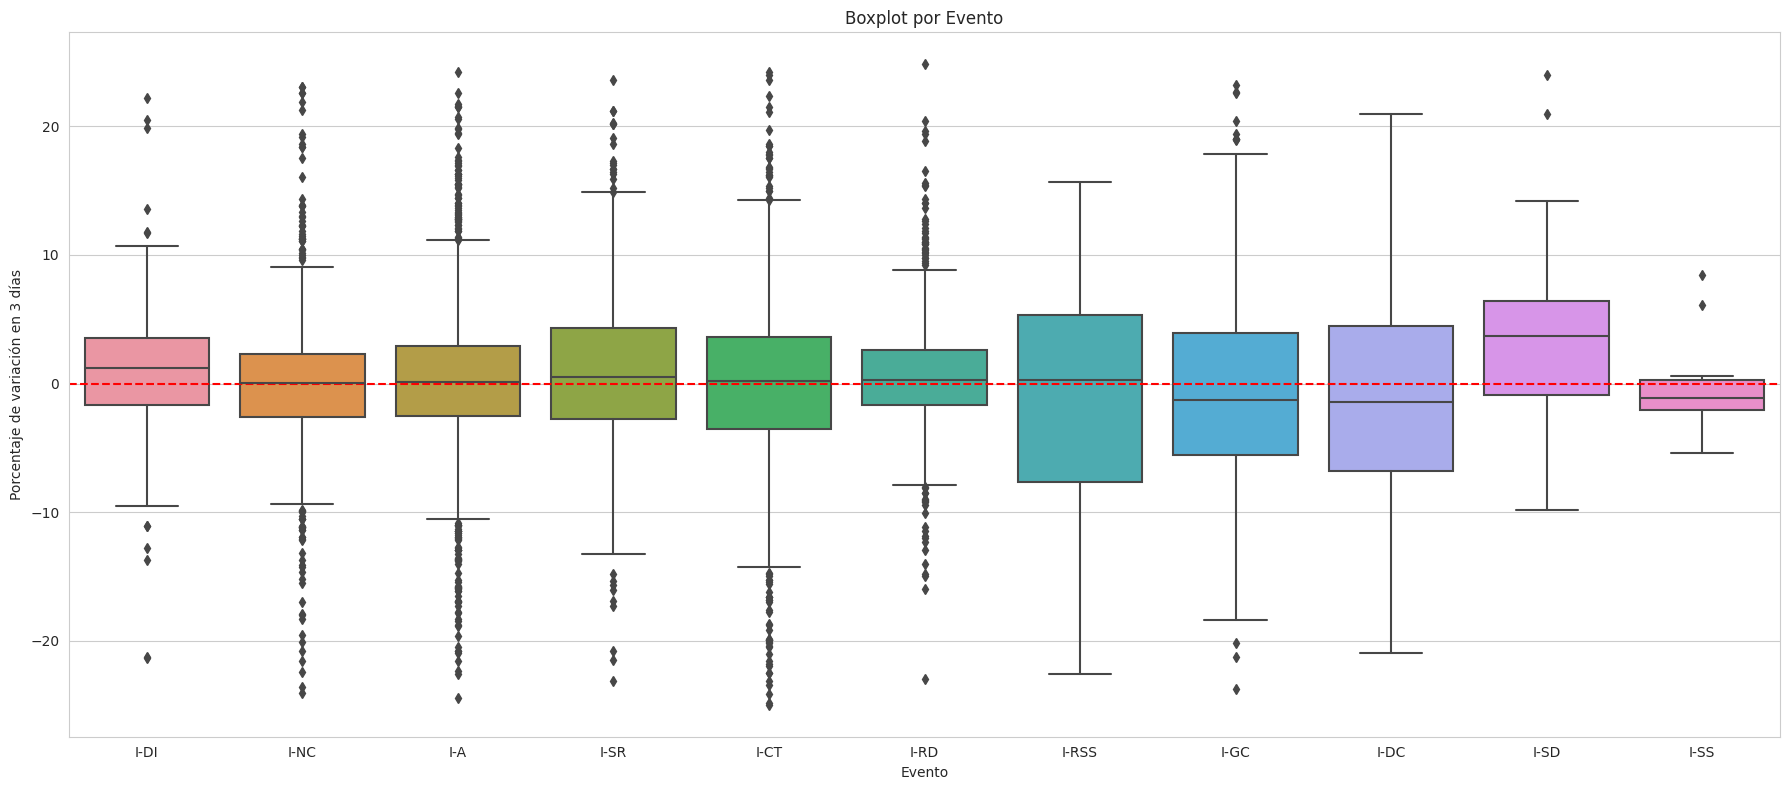

In [7]:
# Removemos algunos outliers que nos dificultan la visualización
news_data = news_data[news_data['percentage_3days'] < 25]
news_data = news_data[news_data['percentage_3days'] > (-25)]

plt.figure(figsize=(18, 8))  # Ajusta el tamaño del gráfico si es necesario
seaborn.boxplot(x='events', y='percentage_3days', data=news_data)

plt.axhline(y=0, color='red', linestyle='--')

# Agrega etiquetas y título
plt.xlabel('Evento')
plt.ylabel('Porcentaje de variación en 3 días')
plt.title('Boxplot por Evento')

plt.tight_layout()

Podemos ver que no hay ningún evento cuyo boxplot este totalmente arriba de 0, es decir que no hay ninguno que nos asegure que el precio va a subir. Sin embargo, el evento I-SD (Special Dividend) parece ser el que mejor rendimiento tiene, observando la mediana por encima del valor 0. Por otro lado, el evento I-SS (Stock Split) es el que peores rendimientos obtiene, casi el 75% de veces el cambio de precio es negativo. El resto se mantiene equilibrado próximo al 0.

En este siguiente gráfico analizaremos el comportamiento promedio del precio para los distintos eventos, para tener una visión más clara si los mismos se pueden pensar como eventos positivos o negativos.

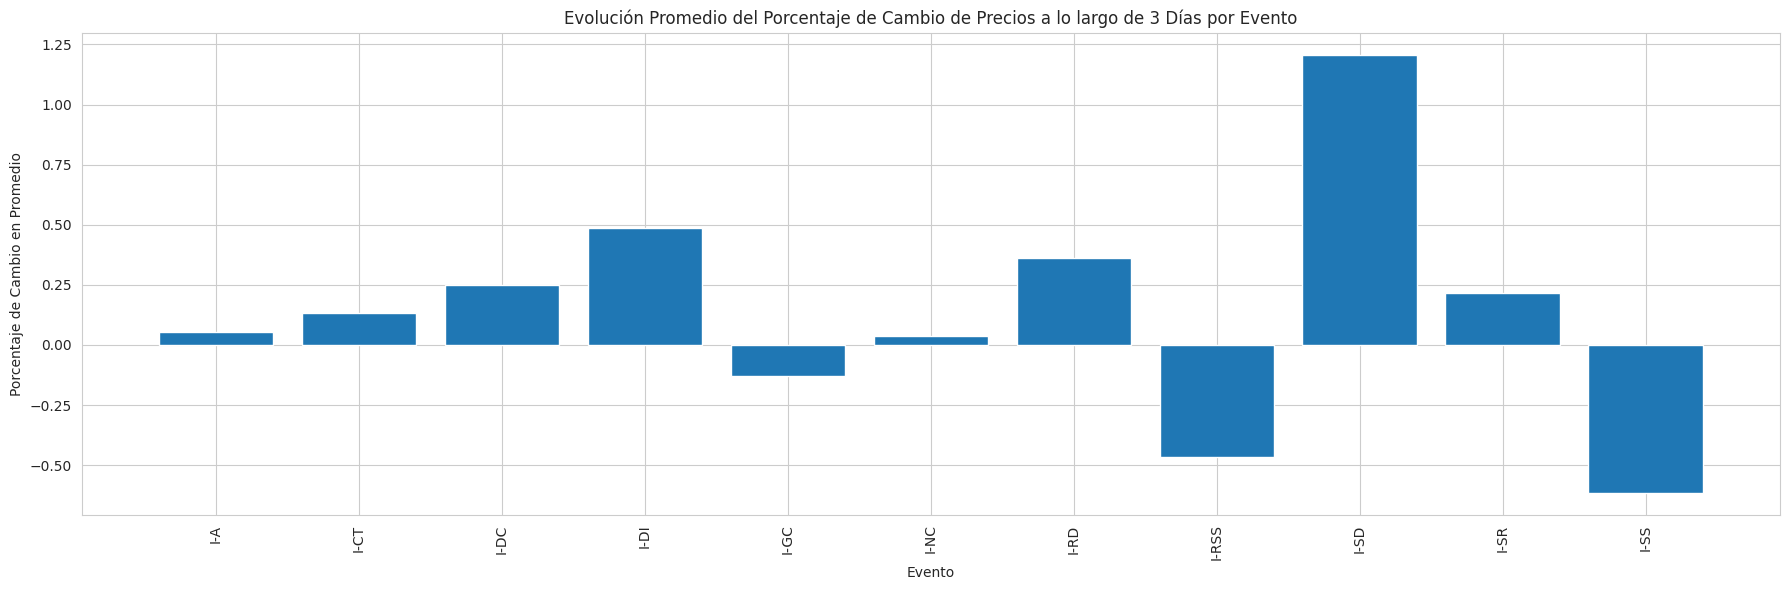

In [8]:
# Calcular el porcentaje de cambios de precios para cada día
price_columns = ['labels.end_price_1day', 'labels.end_price_2day', 'labels.end_price_3day']

price_data = news_data[price_columns]

# Calcular el porcentaje de cambios de precios para cada día
price_data_pct_change = price_data.pct_change(axis=1) * 100  # Multiplicamos por 100 para obtener el porcentaje

# Calcular el promedio del porcentaje de cambios para cada evento
news_data['avg_pct_change'] = price_data_pct_change.mean(axis=1)

# Agrupar por evento y calcular el promedio del porcentaje de cambios para cada grupo
avg_pct_change_by_event = news_data.groupby('events')['avg_pct_change'].mean().reset_index()

plt.figure(figsize=(18, 6))

# Crear el gráfico de barras para mostrar la evolución promedio del porcentaje de cambios por evento
plt.bar(avg_pct_change_by_event['events'], avg_pct_change_by_event['avg_pct_change'])
plt.xlabel('Evento')
plt.ylabel('Porcentaje de Cambio en Promedio')
plt.title('Evolución Promedio del Porcentaje de Cambio de Precios a lo largo de 3 Días por Evento')
plt.xticks(rotation=90)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

En este gráfico podemos ver con un poco más de claridad la tendencia de algunos eventos. Podemos ver que hay varios eventos que presentan porcentajes muy significativos con respecto a los otros. 
I-RSS (Reverse Stock Split) e I-SS (Stock Split) representan un porcentaje considerable de disminución del precio, mientras que I-DI (Dividend Increase) e I-SD (Special Dividend) representan aumento de precios considerable.

Con el objetivo de analizar el comportamiento del precio a lo largo del tiempo teniendo en cuenta, se graficará la variación de precio para las 10 acciones más frecuentes, junto con los eventos ocurridos a lo largo del período analizado. 

In [9]:
# Cálculo de frecuencia y % acumulado
ticker_count = events['labels.ticker'].value_counts(). \
    reset_index().sort_values(by='count', ascending=False)
ticker_count['% cum'] = ticker_count['count'].cumsum()/ticker_count['count'].sum()*100

In [10]:
print('Shape de dataset de tickers agrupados y frecuencias: {}'. \
      format(ticker_count.shape))
ticker_count.head(10)

Shape de dataset de tickers agrupados y frecuencias: (1826, 3)


labels.ticker  count     % cum
0           JNJ     59  1.056212
1          MRNA     58  2.094522
2          ESLT     51  3.007519
3          MSFT     48  3.866810
4          CTSO     33  4.457573
5         DISCA     33  5.048335
6          BCLI     32  5.621196
7           KBR     31  6.176155
8           PFE     28  6.677408
9          GRWG     27  7.160759

In [11]:
# Conversión de columna labels.end_time_3day de 'str' a 'datetime'
events['labels.end_time_3day'] = pd.to_datetime(events['labels.end_time_3day'])
# Filtrado de las 10 acciones más frecuentes
f10 = ticker_count[ticker_count.index < 10]['labels.ticker'].tolist()

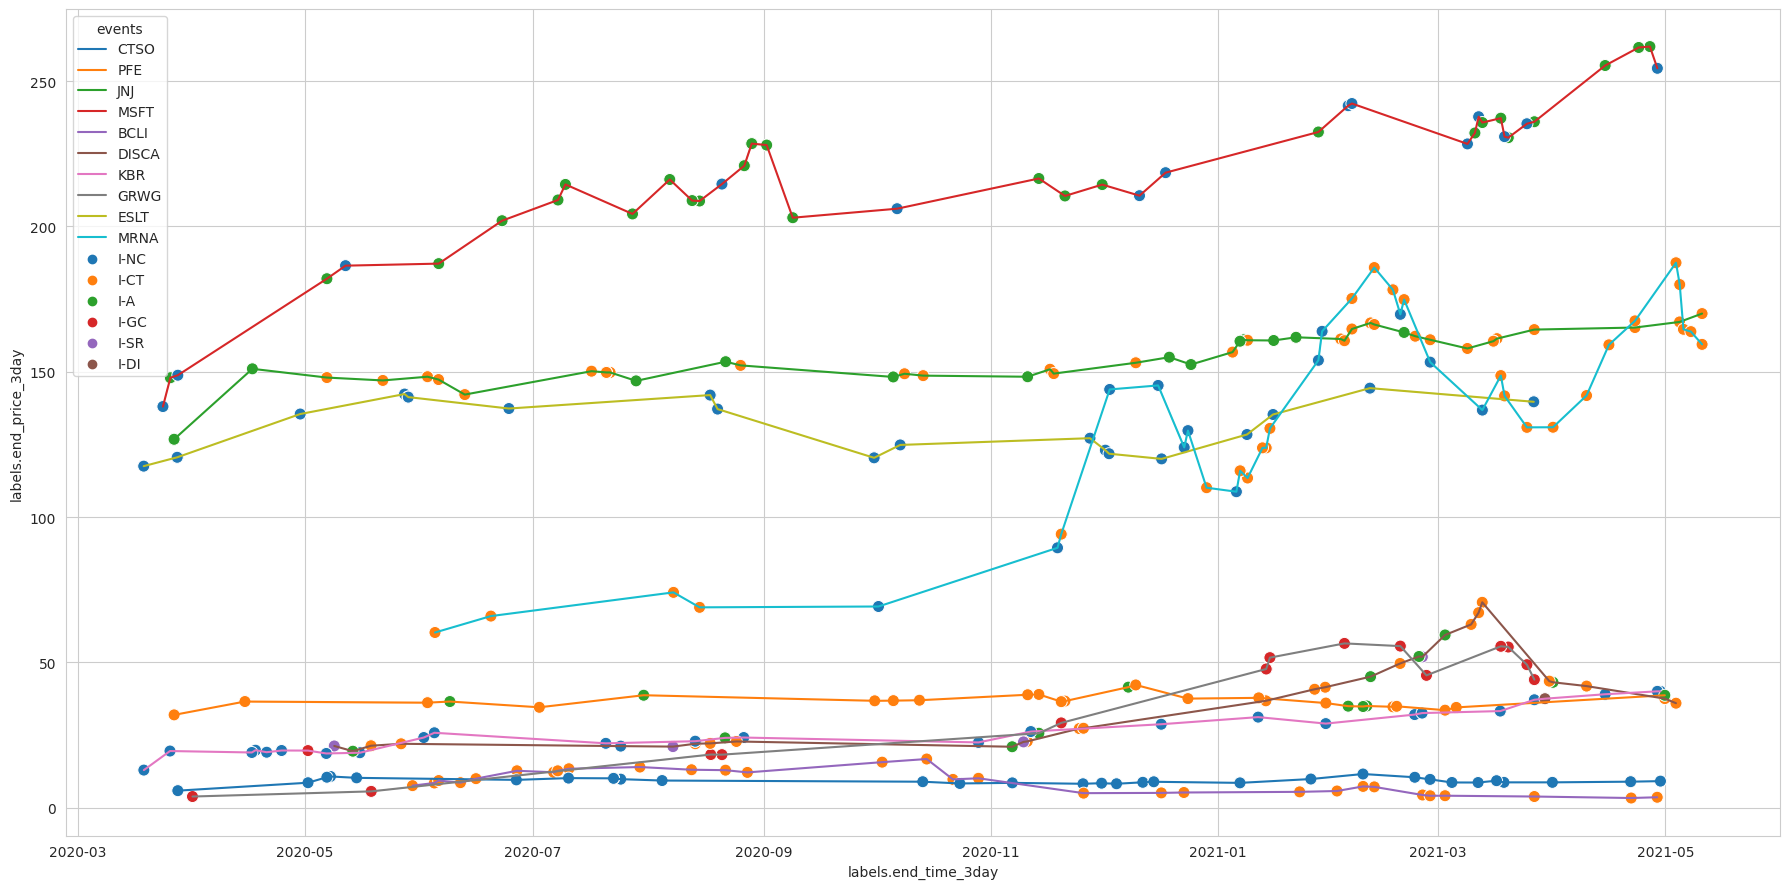

In [12]:
plt.figure(figsize=(18,9))

# Gráfico de variación del precio a lo largo del tiempo por acción
seaborn.lineplot(data=events[events['labels.ticker'].isin(f10)],
                 x='labels.end_time_3day',
                 y='labels.end_price_3day',
                 hue='labels.ticker')

# Gráfico de eventos
seaborn.scatterplot(data=events[events['labels.ticker'].isin(f10)],
                    x='labels.end_time_3day',
                    y='labels.end_price_3day',
                    hue='events', s=75)

plt.tight_layout()

Analizando las gráficas de evolución de precio para cada una de las acciones más frecuentes, observamos que la mayoría de los eventos son etiquetados como I-NC (New Contract), I-CT (Clinical Trial) y I-A (Acquisition). Observamos claramente como los eventos I-CT están relacionados con empresas relacionadas a la medicina, por ejemplo Pfizer, JNJ, Moderna, pero, por otra parte, no se es posible distinguir alguna tendencia en los cambios de precio relacionado con un evento en particular.

Analizaremos nuevamente estas acciones, pero esta vez teniendo en cuenta el cambio porcentual de precio calculado previamente.

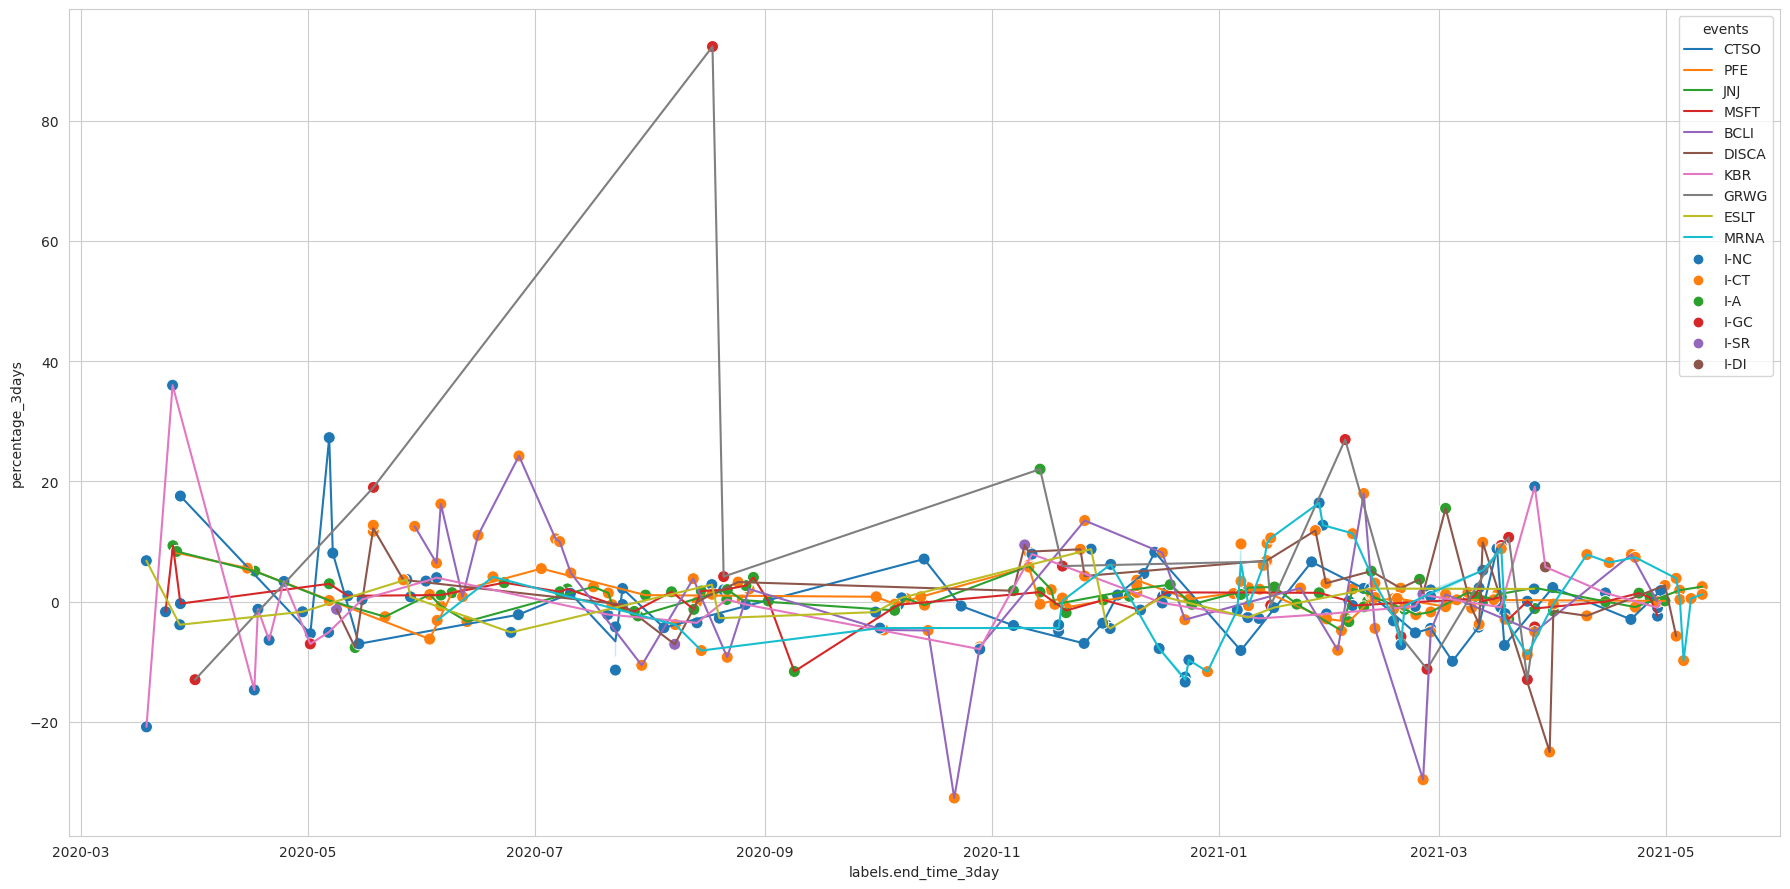

In [13]:
plt.figure(figsize=(18,9))

# Gráfico de variación del precio a lo largo del tiempo por acción
seaborn.lineplot(data=events[events['labels.ticker'].isin(f10)],
                 x='labels.end_time_3day',
                 y='percentage_3days',
                 hue='labels.ticker')

# Gráfico de eventos
seaborn.scatterplot(data=events[events['labels.ticker'].isin(f10)],
                    x='labels.end_time_3day',
                    y='percentage_3days',
                    hue='events', s=75)

plt.tight_layout()

En esta gráfica es más complicado de visualizar los datos, pero se podría interpretar que, por ejemplo, para los eventos **I-CT**, la acción cae cuando los ensayos no salen como se esperaba, mientras que la misma sube cuando los resultados de las pruebas son buenas.

Para una mejor interpretación, se analizarán aquellos tickers que posean alguno de los eventos analizados anteriormente, donde se observó cambios significativos en los cambios de precio.

In [14]:
filtered_tickers = events[events.events.isin(['I-SS', 'I-RSS', 'I-SD', 'I-DI'])]['labels.ticker'].unique()
filtered_tickers[:5]

array(['AMGN', 'ERF', 'COG', 'NEM', 'VET'], dtype=object)

In [15]:
# Filtrado de los tickers de interés
ticker_count = ticker_count[ticker_count['labels.ticker'].isin(filtered_tickers)]
# Filtrado de las 10 acciones más frecuentes
f10 = ticker_count[ticker_count.reset_index().index < 10]['labels.ticker'].tolist()

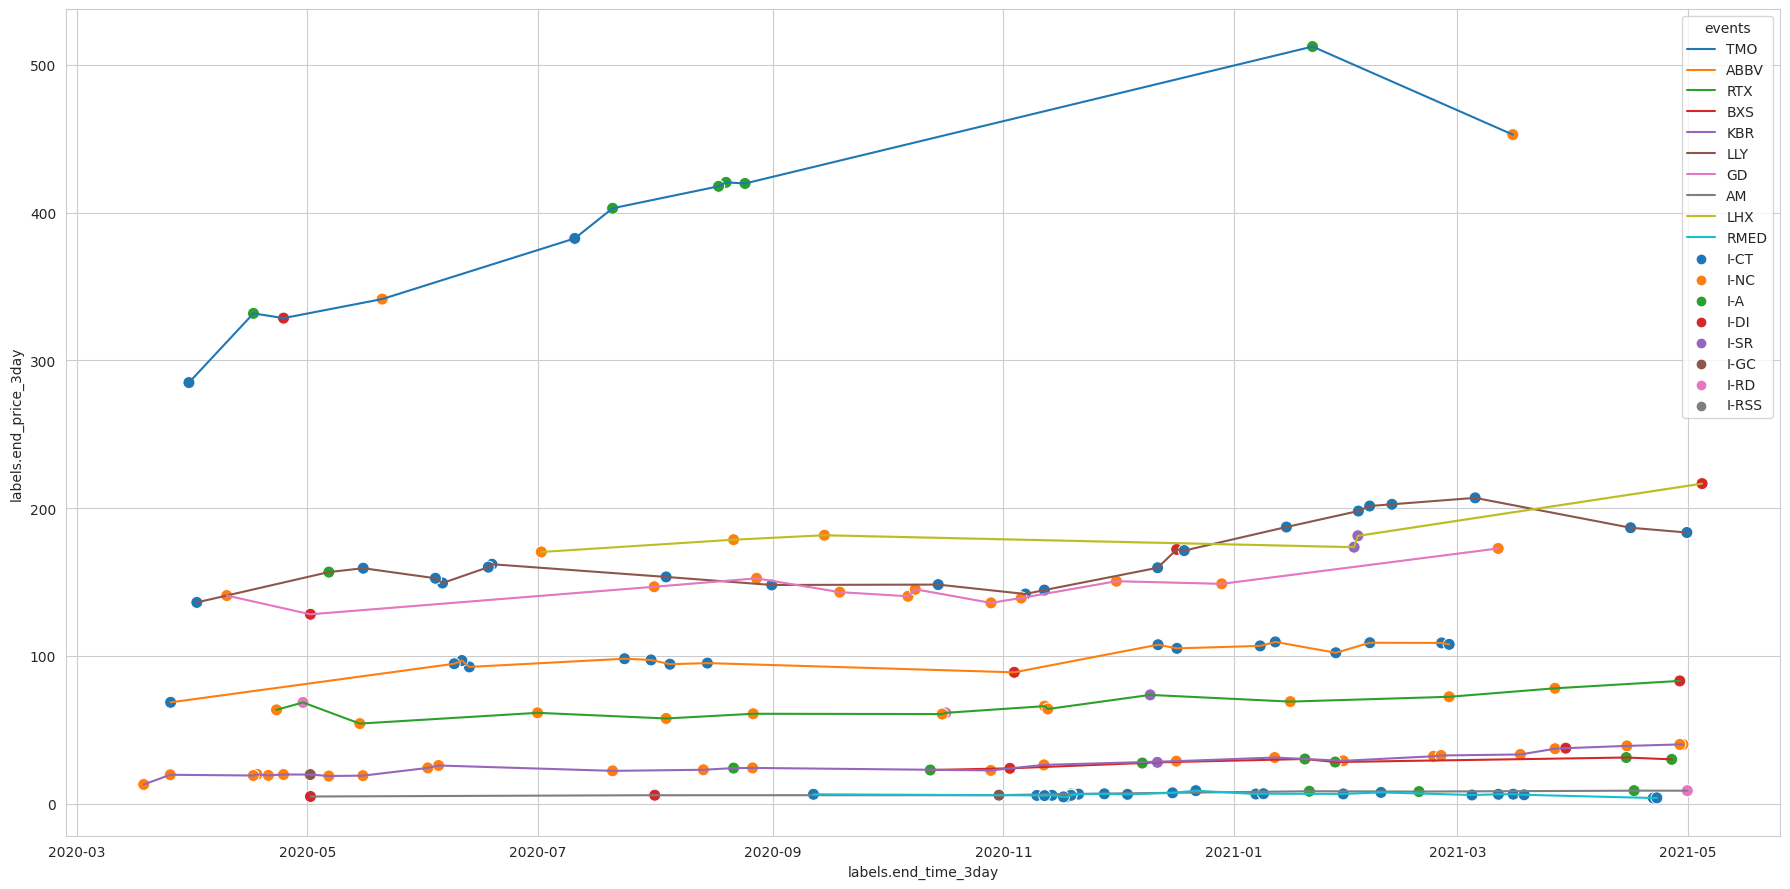

In [16]:
plt.figure(figsize=(18,9))

# Gráfico de variación del precio a lo largo del tiempo por acción
seaborn.lineplot(data=events[events['labels.ticker'].isin(f10)],
                 x='labels.end_time_3day',
                 y='labels.end_price_3day',
                 hue='labels.ticker')

# Gráfico de eventos
seaborn.scatterplot(data=events[events['labels.ticker'].isin(f10)],
                    x='labels.end_time_3day',
                    y='labels.end_price_3day',
                    hue='events', s=75)

plt.tight_layout()

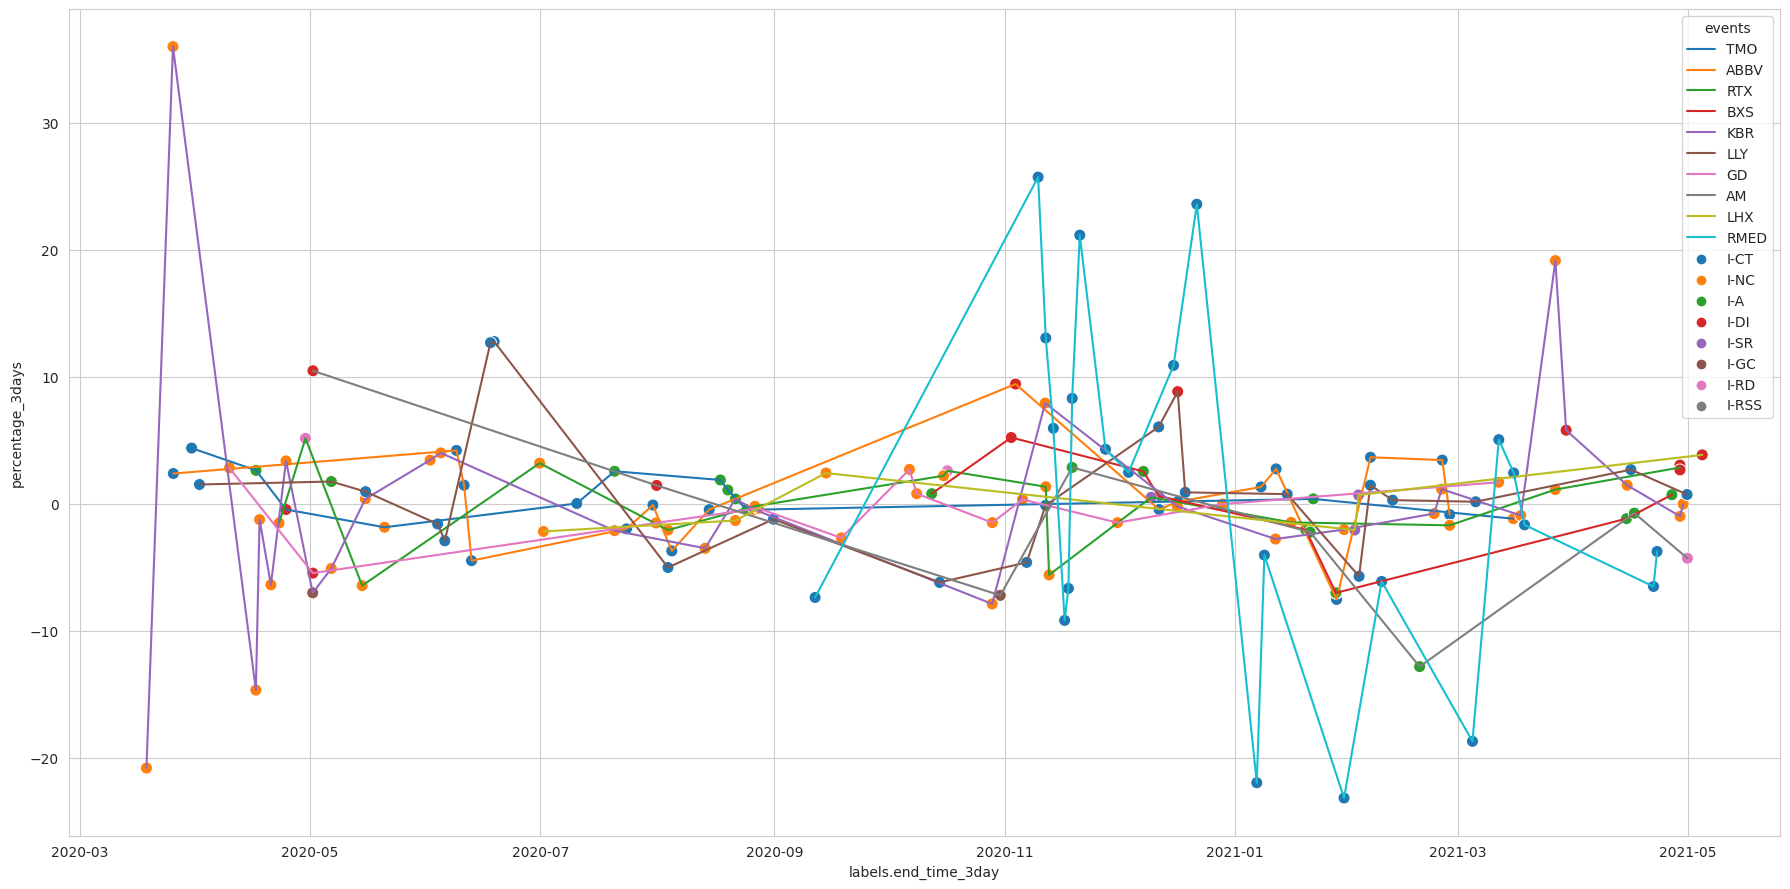

In [17]:
plt.figure(figsize=(18,9))

# Gráfico de variación del precio a lo largo del tiempo por acción
seaborn.lineplot(data=events[events['labels.ticker'].isin(f10)],
                 x='labels.end_time_3day',
                 y='percentage_3days',
                 hue='labels.ticker')

# Gráfico de eventos
seaborn.scatterplot(data=events[events['labels.ticker'].isin(f10)],
                    x='labels.end_time_3day',
                    y='percentage_3days',
                    hue='events', s=75)

plt.tight_layout()

Nuevamente en estas gráficas se nos dificulta determinar qué incidencia tiene cada evento en el cambio de precio, ya que el precio de las mismas contiene el movimiento general del mercado y no solo el movimiento debido al evento ocurrido.

En un trabajo futuro, se puede analizar la incidencia únicamente de los eventos en la variación del precio de las acciones utilizando el ***rendimiento relativo***, restando el movimiento general del mercado. Una forma simple de realizar este cálculo, es utilizar la cotización del **SP500**, el cual es un *índice* que contiene las 500 empresas más importantes de Estados Unidos. Por lo tanto:

\begin{align}Rendimiento relativo por día [\%] = Rstock[\%] - Rsp500[\%]\end{align}

Donde:
* $Rstock = (Pstock(t+1) - Pstock(t))/Pstock(t)$
* $Rsp500 = (Psp500(t+1) - Psp500(t))/Psp500(t)$  

* $Pstock(t+1)$ es el precio de cierre de la acción en el día $t$
* $Pstock(t)$ es el precio de cierre de la acción en el día anterior a $t$ 
* $Psp500(t+1)$ es el precio de cierre del índice SP500 en el día $t$
* $Psp500(t)$ es el precio de cierre del índice SP500 en el día anterior a $t$